In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:\\Users\\user\\Desktop\\New folder\\Projects\\Uber Analysis\\My Uber Drives - 2016.csv')

In [3]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
data.columns = data.columns.str.replace('*','')

In [5]:
data.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.columns

Index(['start_date', 'end_date', 'category', 'start', 'stop', 'miles',
       'purpose'],
      dtype='object')

In [8]:
data.shape

(1156, 7)

In [9]:
data.isnull().sum()

start_date      0
end_date        1
category        1
start           1
stop            1
miles           0
purpose       503
dtype: int64

In [10]:
data.tail()

,start_date,end_date,category,start,stop,miles,purpose
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [11]:
data.drop(index = 1155, axis = 0, inplace = True)

In [12]:
data.shape

(1155, 7)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_date  1155 non-null   object 
 1   end_date    1155 non-null   object 
 2   category    1155 non-null   object 
 3   start       1155 non-null   object 
 4   stop        1155 non-null   object 
 5   miles       1155 non-null   float64
 6   purpose     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [14]:
data.describe()

,miles
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [15]:
data.isnull().sum()

start_date      0
end_date        0
category        0
start           0
stop            0
miles           0
purpose       502
dtype: int64

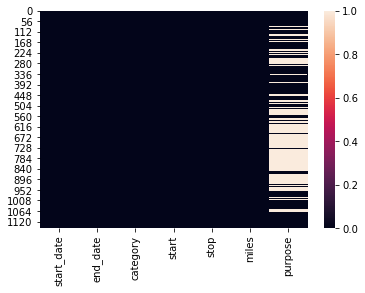

In [16]:
sns.heatmap(data.isnull())
plt.show()

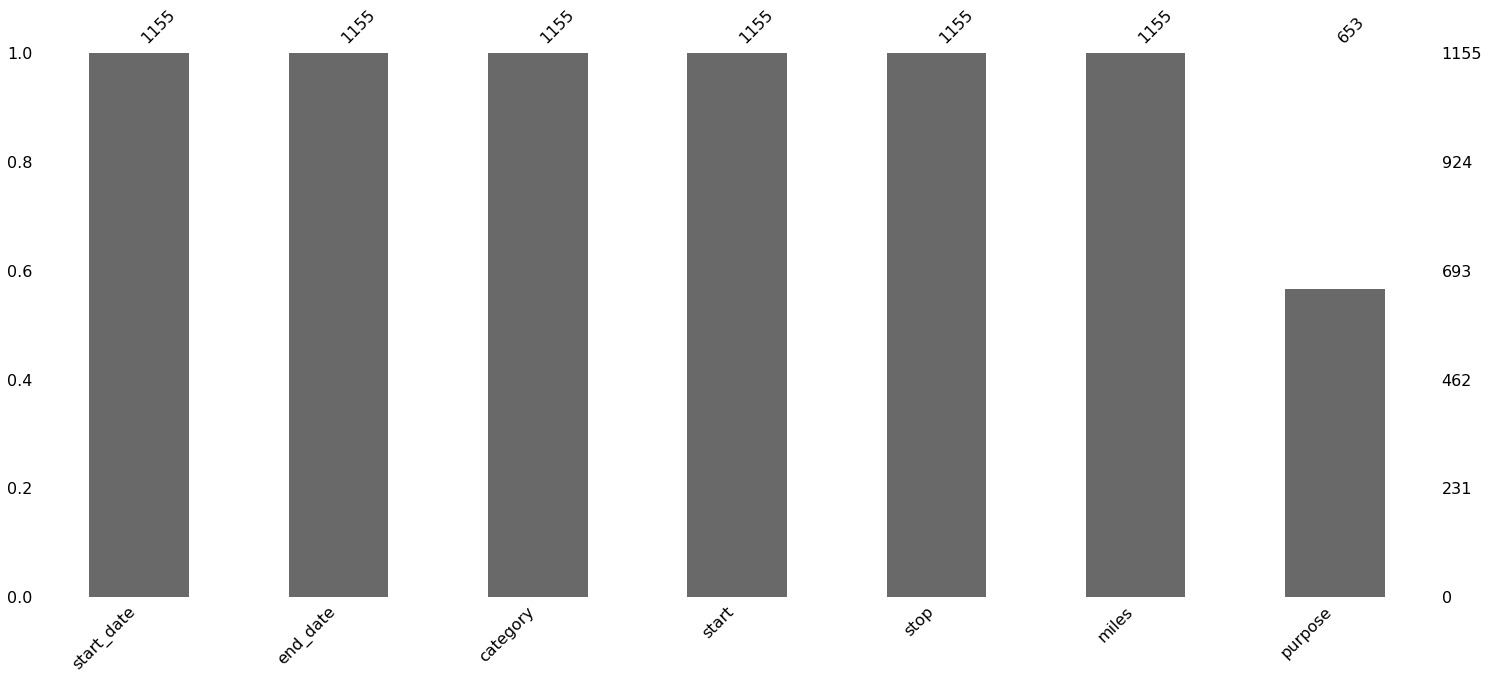

In [17]:
import missingno as msno

msno.bar(data)
plt.show()

In [18]:
data['purpose'].isnull().sum() / len(data)

0.43463203463203465

In [19]:
data['purpose'].fillna(method = 'ffill', inplace = True)
#forwarded fill is applied here

In [20]:
data.isnull().sum()

start_date    0
end_date      0
category      0
start         0
stop          0
miles         0
purpose       0
dtype: int64

***

In [21]:
import time, datetime

data['start_date'] = pd.to_datetime(data['start_date'], errors = 'coerce')
data['end_date'] = pd.to_datetime(data['end_date'], errors = 'coerce')

data['minutes'] = data.end_date - data.start_date

data['minutes'] = data['minutes'].dt.total_seconds() / 60

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_date  1155 non-null   datetime64[ns]
 1   end_date    1155 non-null   datetime64[ns]
 2   category    1155 non-null   object        
 3   start       1155 non-null   object        
 4   stop        1155 non-null   object        
 5   miles       1155 non-null   float64       
 6   purpose     1155 non-null   object        
 7   minutes     1155 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 81.2+ KB


In [22]:
data.head()

,start_date,end_date,category,start,stop,miles,purpose,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


col_0,Count of travels as per category
category,
Business,1078
Personal,77


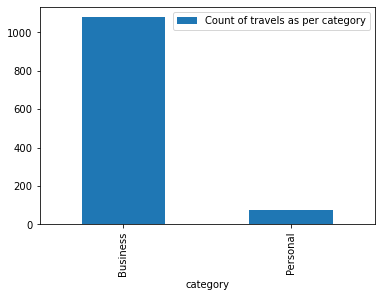

In [23]:
cat = pd.crosstab(data['category'], columns = 'Count of travels as per category')

cat.plot(kind = 'bar')
plt.legend()
cat

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Apex                 17
Westpark Place       17
Berkeley             16
Midtown              14
R?walpindi           11
Kissimmee            11
Kenner               11
Name: start, dtype: int64


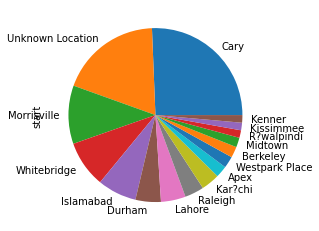

In [24]:
start_point = data.start.value_counts()
start_point
print(start_point[start_point > 10])

start_point[start_point > 10].plot(kind = 'pie')
plt.show()

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Lahore               36
Durham               36
Raleigh              29
Kar?chi              26
Apex                 17
Westpark Place       16
Berkeley             16
R?walpindi           13
Kissimmee            12
Midtown              11
Name: stop, dtype: int64


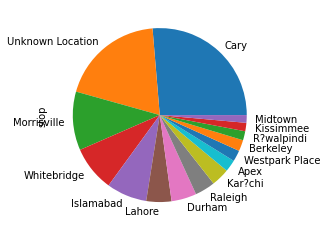

In [25]:
stop_point = data.stop.value_counts()
stop_point
print(stop_point[stop_point > 10])

stop_point[stop_point > 10].plot(kind = 'pie')
plt.show()

9.9     28
3.1     26
3.0     19
2.1     19
2.5     19
10.4    19
1.8     18
2.2     18
1.7     18
3.3     16
2.0     16
2.8     16
1.9     16
3.8     15
6.1     15
5.5     14
1.4     14
7.9     13
1.6     13
Name: miles, dtype: int64


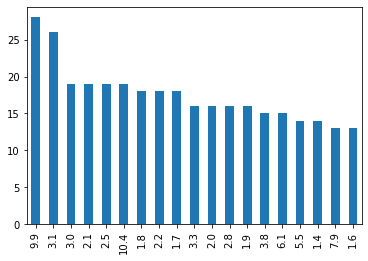

In [26]:
distance = data.miles.value_counts()
distance
print(distance[distance > 12])

distance[distance > 12].plot(kind = 'bar')
plt.show()

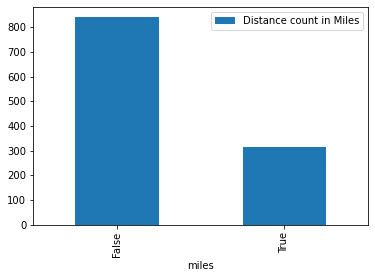

col_0,Distance count in Miles
miles,
False,840
True,315


In [27]:
distance = pd.crosstab(index = data['miles'] > 10, columns = 'Distance count in Miles')

distance.plot(kind = 'bar')
plt.legend()
plt.show()
distance

In [28]:
data.purpose.value_counts()

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: purpose, dtype: int64

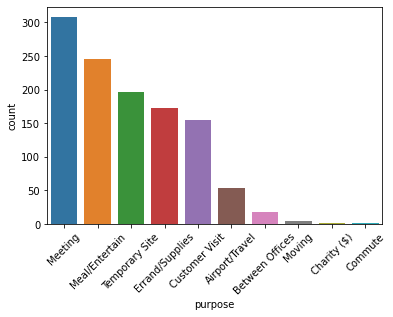

In [29]:
sns.countplot(data['purpose'], order = data['purpose'].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

In [30]:
pd.DataFrame({'Mean': data.groupby(['purpose'])['miles'].mean().round(1),
              'Min': data.groupby(['purpose'])['miles'].min().round(1),
              'Max': data.groupby(['purpose'])['miles'].max().round(1)}).reset_index()

,purpose,Mean,Min,Max
0,Airport/Travel,15.0,0.9,156.9
1,Between Offices,10.9,1.9,39.2
2,Charity ($),15.1,15.1,15.1
3,Commute,180.2,180.2,180.2
4,Customer Visit,16.1,0.6,310.3
5,Errand/Supplies,5.9,0.5,195.3
6,Meal/Entertain,5.8,0.6,36.5
7,Meeting,12.7,0.7,201.0
8,Moving,4.6,3.3,6.1
9,Temporary Site,11.0,0.7,195.6


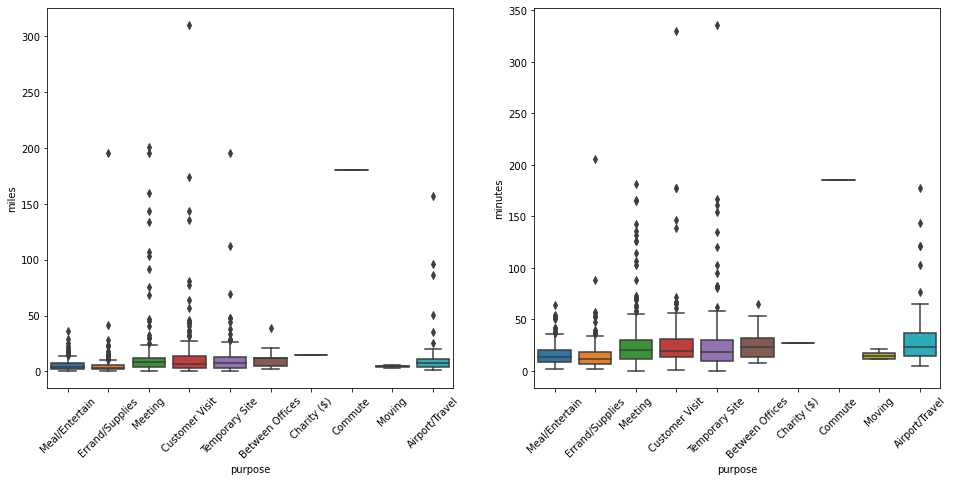

In [31]:
plt.figure(figsize = (16, 7))

plt.subplot(1,2,1)
sns.boxplot(data = data, x = data.purpose, y = data.miles)
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.boxplot(data = data, x = data.purpose, y = data.minutes)
plt.xticks(rotation = 45)

plt.show()

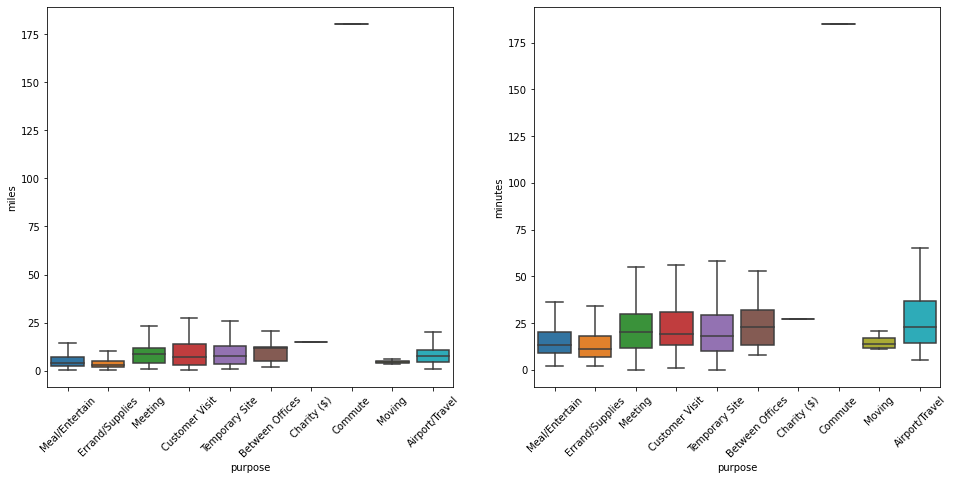

In [32]:
# without outliers

plt.figure(figsize = (16, 7))

plt.subplot(1,2,1)
sns.boxplot(data = data, x = data.purpose, y = data.miles, showfliers = False)
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.boxplot(data = data, x = data.purpose, y = data.minutes, showfliers = False)
plt.xticks(rotation = 45)

plt.show()

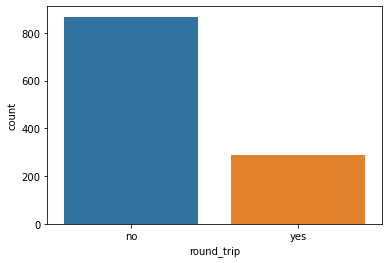

In [33]:
def round(x):
    if x['start'] == x['stop']:
        return 'yes'
    else:
        return 'no'
    
data['round_trip'] = data.apply(round, axis = 1)

sns.countplot(data['round_trip'], order = data['round_trip'].value_counts().index)
plt.show()

In [34]:
data['month'] = pd.DatetimeIndex(data['start_date']).month

In [35]:
dic = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec' }
data['month'] = data['month'].map(dic)

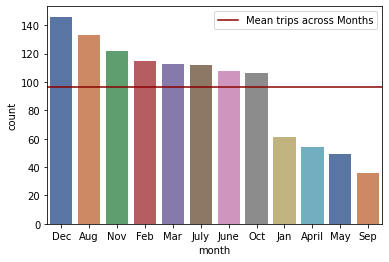

In [36]:
sns.countplot(data['month'], order = data['month'].value_counts().index, palette = 'deep')
plt.axhline(data['month'].value_counts().mean(), color = 'darkred', label = 'Mean trips across Months')
plt.legend()
plt.show()

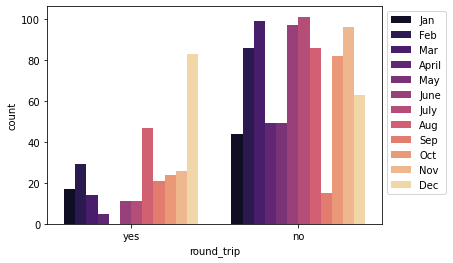

In [37]:
sns.countplot(data['round_trip'], hue = data['month'], palette = 'magma')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

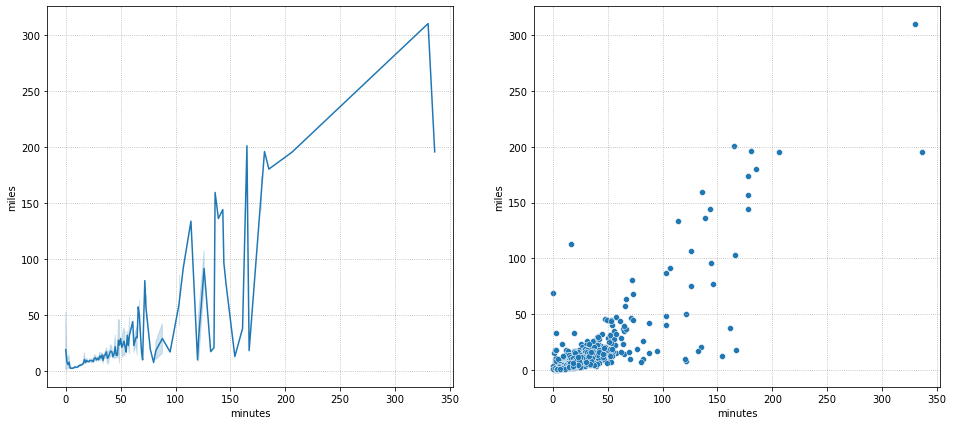

In [38]:
plt.figure(figsize = (16, 7))

plt.subplot(1,2,1)
sns.lineplot(data = data, x = data.minutes, y = data.miles)
plt.grid(True, linestyle = 'dotted')

plt.subplot(1,2,2)
sns.scatterplot(data = data, x = data.minutes, y = data.miles)
plt.grid(True, linestyle = 'dotted')

plt.show()

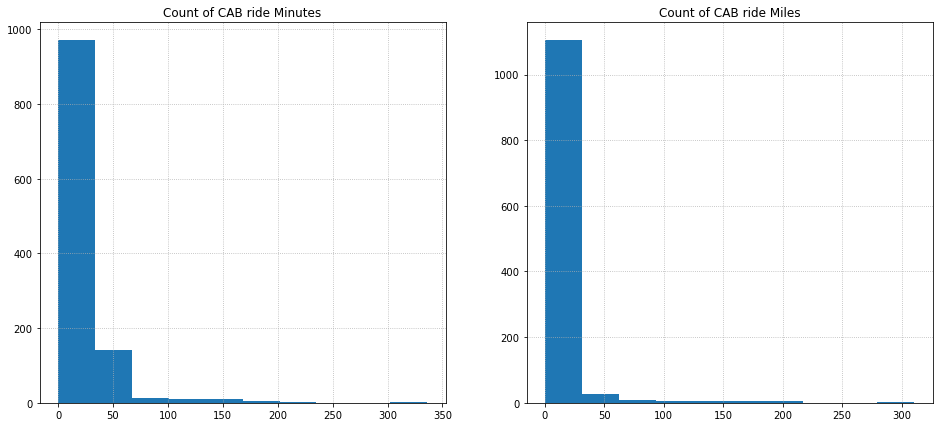

In [39]:
plt.figure(figsize = (16, 7))

plt.subplot(1,2,1)
n, bins, patches = plt.hist(data.minutes)
plt.grid(True, linestyle = 'dotted')
plt.title('Count of CAB ride Minutes')

plt.subplot(1,2,2)
n, bins, patches = plt.hist(data.miles)
plt.grid(True, linestyle = 'dotted')
plt.title('Count of CAB ride Miles')

plt.show()

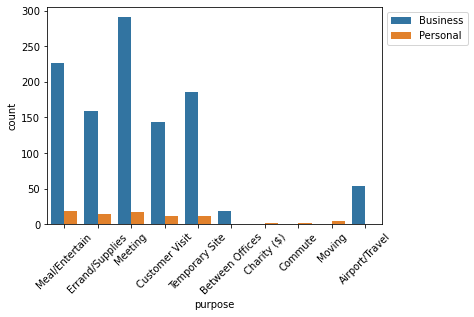

In [40]:
sns.countplot(data = data, x = 'purpose', hue = 'category')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor = (1,1))
plt.show()

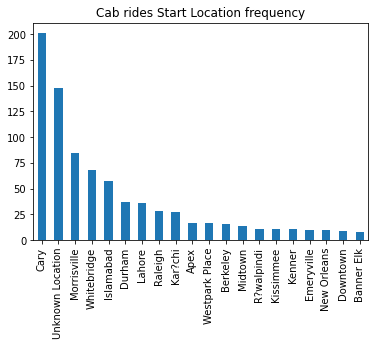

In [41]:
pd.Series(data['start']).value_counts()[:20].plot(kind = 'bar')
plt.title('Cab rides Start Location frequency')
plt.show()

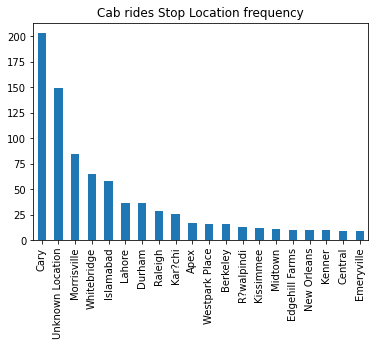

In [42]:
pd.Series(data['stop']).value_counts()[:20].plot(kind = 'bar')
plt.title('Cab rides Stop Location frequency')
plt.show()

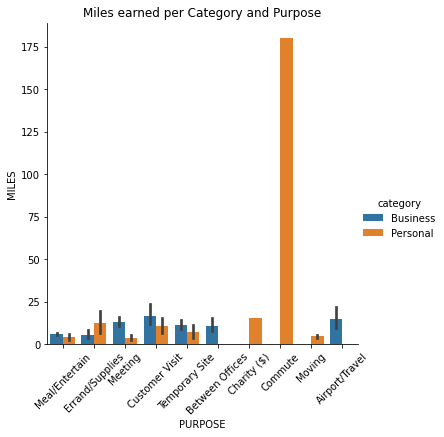

In [43]:
ax = sns.factorplot(data = data, x = 'purpose', y = 'miles', hue = 'category', kind = 'bar')

ax.set_xlabels('PURPOSE')
ax.set_ylabels('MILES')

plt.title('Miles earned per Category and Purpose')
plt.xticks(rotation = 45)
plt.show()